In [26]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


# DATA INFORMATION
We'll work with the Ecommerce Customers.csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.  
* Time on App: Average time spent on App in minutes  
* Time on Website: Average time spent on Website in minutes  
* Length of Membership: How many years the customer has been a member.  

In [27]:
e_customers = pd.read_csv("Ecommerce Customers.csv")

# TODO 1: EDA

In [28]:
e_customers.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [29]:
e_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [30]:
e_customers.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

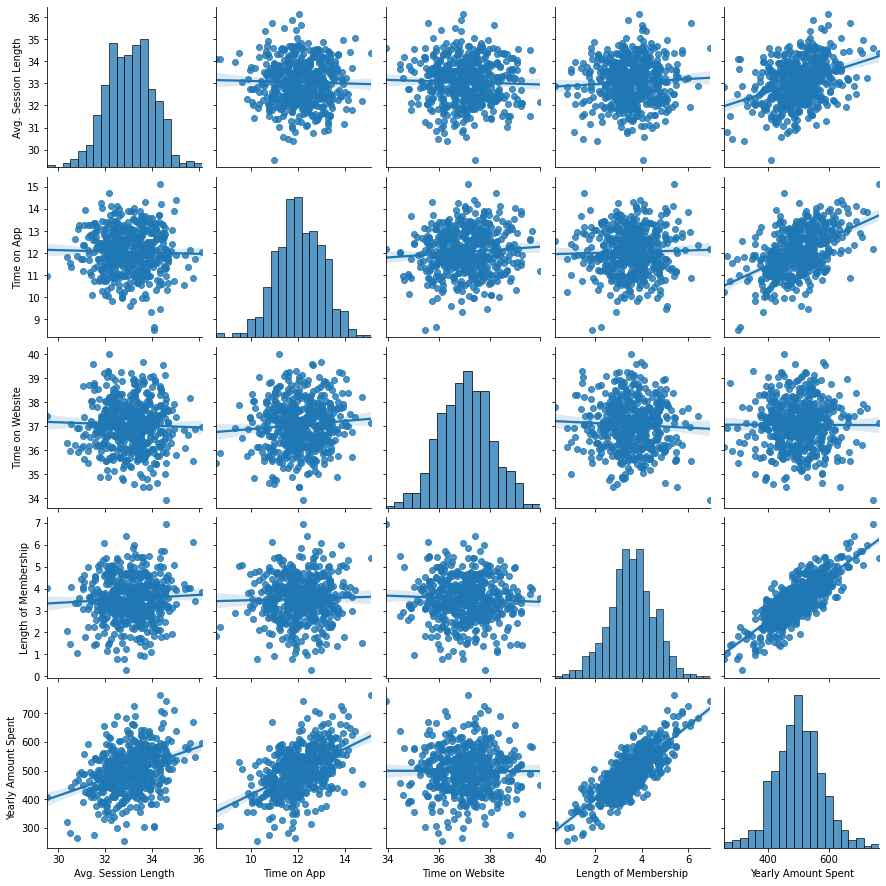

In [31]:
sns.pairplot(e_customers, kind='reg')

**Nhận xét**
* Các biến numerical đều có mức độ phân phối cân xứng


<AxesSubplot:>

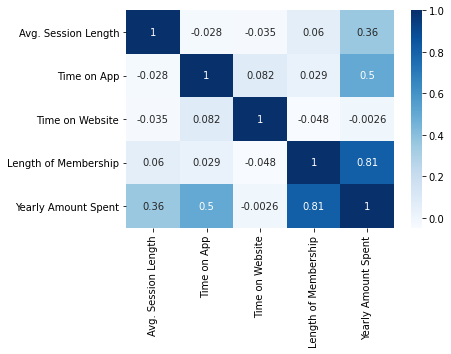

In [32]:
sns.heatmap(e_customers.corr(),annot=True,cmap='Blues')

**Nhận xét**
* Có mối tương quan dương mạnh mẽ giữa Yearly Amount Spent và Length of Membership  
    - Khách hàng càng lâu năm (khách hàng trung thành) thì càng chi nhiều tiền để mua sản phẩm   
    - Công ty có thể đnag thực hiện chính sách khách hàng tốt và có sản phẩm chất lượng
* Có mối tương quan dương giữa Yearly Amount Spent và Time on App, tuy nhiên giữa Yearly Amount Spent và Time on Website lại có mối tương quan âm  
    - Việc sử sụng app mang lại sự tiện ích cho khách hàng (càng sử dụng app nhiều thì số tiền mua hàng càng cao), tuy nhiên website lại đang có vấn đề rất lớn (có thể là giao diện khó sử dụng, đường truyền, tính tiện lợi ..vv) dẫn đến việc truy cập lâu không khiến khách hàng chi nhiều tiền mua hàng hơn  
    - Công ty nên nâng cao trải nghiệm người dùng trên website
* Thời gian sử dụng App trung bình là 12.052488 phút và thời gian sử dụng Web trung bình là 37.060445 phút

# TODO 2: LINEAR REGRESSIONS

## Data Processing

In [48]:
x =e_customers.iloc[:,3:-1]
y = e_customers.iloc[:,-1]

In [34]:
# x = e_customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
# y = e_customers['Yearly Amount Spent']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

## Split Train & Test Data

In [36]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression().fit(X_train, y_train)

In [37]:
coef=pd.DataFrame([X_train.columns, reg.coef_]).T
coef=coef.rename(columns={0:'Attributes',1:'Coefficients'})
coef

Attributes Coefficients
0   Avg. Session Length    25.724256
1           Time on App    38.597135
2       Time on Website     0.459148
3  Length of Membership    61.674732

In [38]:
ytest_pred = reg.predict(X_test)

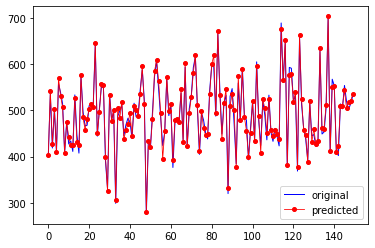

In [39]:
x_ax = range(len(X_test))
plt.plot(x_ax, y_test, lw=1, color="blue", label="original")
plt.plot(x_ax, ytest_pred, lw=0.8, color="red", label="predicted",marker="o", markersize=4)
plt.legend()
plt.show()

In [40]:
df_plot = pd.DataFrame({'pred_price': ytest_pred, 'actual_price': y_test})
df_plot.head()

pred_price  actual_price
361  403.669931    401.033135
73   542.577563    534.777188
374  427.065917    418.602742
155  502.024604    503.978379
104  410.121436    410.069611

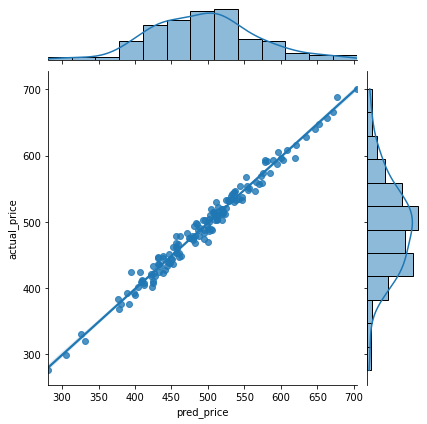

In [41]:
sns.jointplot(x='pred_price',y='actual_price',data=df_plot,kind='reg')

## Evaluating the Model

In [42]:
from sklearn import metrics
lin_acc=metrics.r2_score(ytest_pred, y_test)
print("R^2: ",lin_acc)
print("MAE: ", metrics.mean_absolute_error(ytest_pred, y_test))
print("MSE: ", metrics.mean_squared_error(ytest_pred, y_test))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytest_pred, y_test)))
print("Max Error: ", metrics.max_error(ytest_pred, y_test))

R^2:  0.9806128539052735
MAE:  8.42609164143207
MSE:  103.9155413650327
RMSE:  10.193897260863123
Max Error:  30.812190004542856


# TODO 3: CUSTOMER CLUSTERING

In [50]:
cluster_df = e_customers.copy()
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
cluster_df["Cluster"] = kmeans.fit_predict(x)
cluster_df["Cluster"] = cluster_df["Cluster"].astype("category")
cluster_df.head(5)

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent Cluster  
0           587.951054       0  
1           392.204933       2  
2           487.547505       0  
3           581.852344       1  
4           599.406092       1

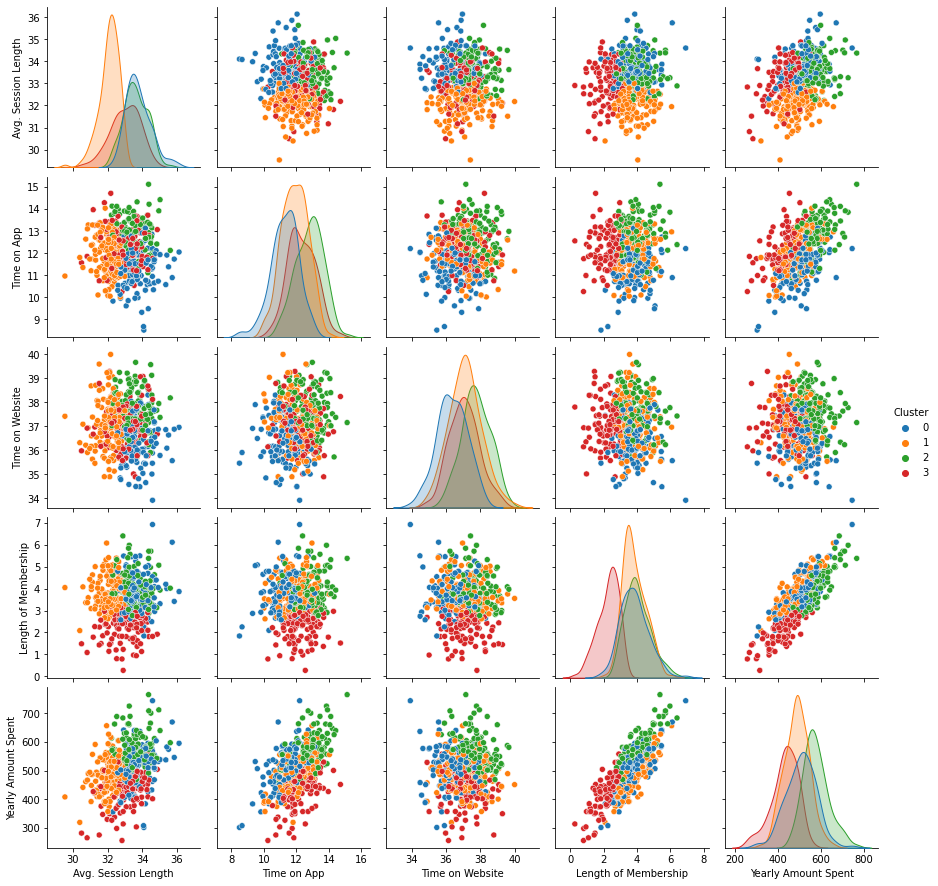

In [44]:
sns.pairplot(data=cluster_df,hue="Cluster")

### Nhận xét:
* Dựa trên 4 nhóm, chúng tôi có thể xây dựng các chiến lược kinh doanh phù hợp với từng nhóm như sau:
    - Nhóm 0 và 2 đang là nhóm khách hàng trung thành nhất và đem lại doanh thu cao. Không có sự phân biệt rõ ràng về thời gian họ sử dụng App hay Website, nhưng đây là nhóm khách hàng cần có sự chăm sóc đặt biệt (dựa vào Avg.Sesion Length). Có thể có một số chiến dịch khuyến mại dựa trên giá chiết khấu cho nhóm này để giữ chân họ.  
    - Nhóm 3 đang là nhóm có chi tiêu thấp nhất, có thể hiểu nguyên nhân có thể là sự không hài lòng đối với sản phẩm/dịch vụ hoặc khả năng trải nghiệm người dùng trên website kém dẫn đến mức chi tiêu thấp của nhóm khách hàng này
    - Nhóm 1 là nhóm khách hàng khá ổn định (em ko ra insight gì nữa cả 😂)